### CS 457 - Homework Assignment 3: Exploratory Data Analysis
### Shahzaib Amir (sa05578)
### Email Address: sa05578@st.habib.edu.pk

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

### Part 1

In [10]:
p1_df = pd.read_csv('loan_small.csv')
p1_df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


Loan_status

In [11]:
loan_replacement = {'Fully Paid': 'Good Reputation', 'Current': 'Good Reputation', 'Charged Off': 'Bad Reputation', 'Default':'Bad Reputation', 'Late (31-120 days)': 'Bad Reputation'}
p1_df['loan_status'] = p1_df['loan_status'].replace(loan_replacement)
p1_df['loan_status']

0      Good Reputation
1       Bad Reputation
2      Good Reputation
3      Good Reputation
4      Good Reputation
            ...       
994    Good Reputation
995    Good Reputation
996    Good Reputation
997    Good Reputation
998    Good Reputation
Name: loan_status, Length: 999, dtype: object

Term

In [12]:
p1_df['term'] = p1_df['term'].str.strip(' months').astype('int')


Emp_length

In [13]:
# set(p1_df["emp_length"])

p1_df.emp_length.fillna(value=0, inplace=True)
p1_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
p1_df['emp_length'] = p1_df['emp_length'].astype(int)
p1_df['emp_length']
### https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.replace.html

0      10
1       1
2      10
3      10
4       1
       ..
994     5
995     3
996     2
997    10
998    10
Name: emp_length, Length: 999, dtype: int32

mths_since_last_delinq and mths_since_last_record

In [14]:
# p1_df.columns[p1_df.isnull().any()].tolist()


### We will use median to fill up missing values in Ordinal Numerical columns
p1_df['mths_since_last_delinq'] = p1_df['mths_since_last_delinq'].fillna(p1_df['mths_since_last_delinq'].median(), inplace = True)
p1_df['mths_since_last_record'] = p1_df['mths_since_last_record'].fillna(p1_df['mths_since_last_record'].median(), inplace = True)


emp_title and last_pymnt_d

In [15]:
#Filling in null values
p1_df['emp_title'] = p1_df['emp_title'].fillna(value = '')
p1_df['last_pymnt_d'] = p1_df['last_pymnt_d'].fillna(value = '')

### Part 2

Summary

In [16]:
p1_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.060005e+06,1.291575e+06,12704.354354,12197.797798,12137.165302,42.582583,12.961331,366.992743,5.274274,62118.790330,...,393.475025,392.977998,13218.969378,13123.601622,10395.572492,2703.640891,1.081158,118.674915,9.817802,2762.736486
std,1.602660e+04,2.112723e+04,7463.253235,6804.931895,6743.323264,10.712911,3.881742,200.510423,3.390256,31899.138102,...,1372.152659,1370.738354,8515.600032,8384.022752,6727.488181,2757.603166,6.533628,606.058706,87.107689,4426.094619
min,7.659270e+05,9.431350e+05,1000.000000,1000.000000,1000.000000,36.000000,6.030000,33.940000,0.000000,12000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.058868e+06,1.290204e+06,7050.000000,7000.000000,7000.000000,36.000000,9.910000,223.440000,2.000000,40000.000000,...,0.000000,0.000000,6903.943290,6894.465000,5110.360000,960.535000,0.000000,0.000000,0.000000,281.185000
50%,1.061891e+06,1.293501e+06,11500.000000,11000.000000,10800.000000,36.000000,12.690000,337.750000,5.000000,55000.000000,...,0.000000,0.000000,11599.078020,11593.400000,9600.000000,1807.880000,0.000000,0.000000,0.000000,530.780000
75%,1.065345e+06,1.299062e+06,16050.000000,16000.000000,15946.571055,60.000000,15.960000,469.235000,9.000000,75500.000000,...,0.000000,0.000000,17559.547470,17404.910000,14000.000000,3279.710000,0.000000,0.000000,0.000000,3516.275000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,23.910000,1243.850000,10.000000,276000.000000,...,10069.400000,10062.140000,45755.229980,44519.610000,35000.000000,19834.120000,94.480000,11349.520000,2043.180000,28412.430000


The total count of each column is same which means the data is consistent after the data is cleaned and the mssing values are filled.

The mean interest offered is 12.96% which is almost 13% which is good as even the minimum almost half of the mean.

High interest rates are due to the reason that the mean annual income is almost $ 60,000. Thus, this shows a relation that the people with higher income have a chance of being offered high interest rates. Moreover, the installments are also quite feasible too in with respect to the interest rates offered. Mean installment is about $350.

Purpose count

In [17]:
# set(p1_df['purpose'])
count_debt = p1_df['purpose'].value_counts().debt_consolidation
count_card = p1_df['purpose'].value_counts().credit_card
count_other = p1_df['purpose'].value_counts().other
count_homeimpr = p1_df['purpose'].value_counts().home_improvement
count_business = p1_df['purpose'].value_counts().small_business
count_car = p1_df['purpose'].value_counts().car
count_purchase = p1_df['purpose'].value_counts().major_purchase
count_medical = p1_df['purpose'].value_counts().medical
count_wedding = p1_df['purpose'].value_counts().wedding
count_vacation = p1_df['purpose'].value_counts().vacation
count_house = p1_df['purpose'].value_counts().house
count_moving = p1_df['purpose'].value_counts().moving
count_energy = p1_df['purpose'].value_counts().renewable_energy

### Univariate Analysis

Representation of purpose using Bar Chart

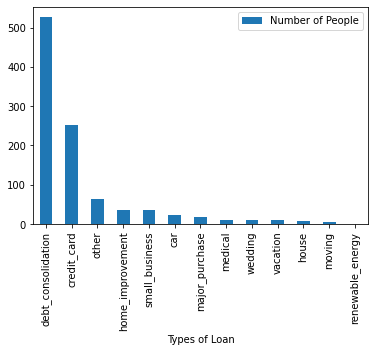

In [18]:

df1 = pd.DataFrame({'Types of Loan':['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'small_business', 'car', 'major_purchase', 
'medical', 'wedding', 'vacation', 'house', 'moving', 'renewable_energy'], 'Number of People':[count_debt, count_card, count_other, count_homeimpr, count_business,
count_car, count_purchase, count_medical, count_wedding, count_vacation, count_house, count_moving, count_energy]})
ax1 = df1.plot.bar(x='Types of Loan', y='Number of People', rot=90)

Because bar charts are good at representing discrete data, I decided to use them to represent the number of loan purposes. An insight of the data is that the major purpose of taking a loan is for debt consolidation to renew the loan terms for better monthly payments while the least is for spending on renewable energy sources.

home_ownership count

In [19]:
# set(p1_df['home_ownership'])
count_mortgage = p1_df['home_ownership'].value_counts().MORTGAGE
count_own = p1_df['home_ownership'].value_counts().OWN
count_rent = p1_df['home_ownership'].value_counts().RENT

Representation of home_ownership using Pie Chart to check why there are low number of loans for house.

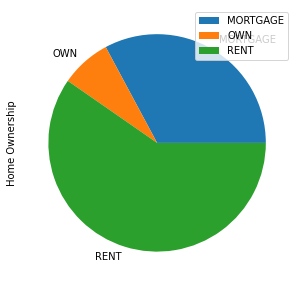

In [20]:

df = pd.DataFrame({'Home Ownership': [count_mortgage, count_own , count_rent]},
                  index=['MORTGAGE', 'OWN', 'RENT'])
plot = df.plot.pie(y='Home Ownership', figsize=(5, 5))
##Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html


The pie chart shows that few people own a home, so few people would take out house loans to build, redecorate, or relocate. As a result, the number of house loans taken are low. 

Interest Rate provided to Customers represented using Histogram

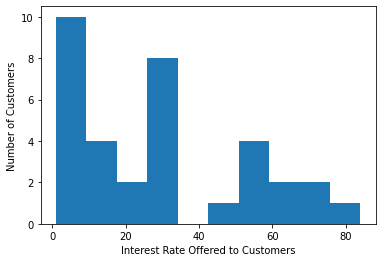

In [21]:
fig, ax2 = plt.subplots(1,1)
arr = np.array(list(p1_df['int_rate'].value_counts()))
plt.hist(arr)
ax2.set_xlabel('Interest Rate Offered to Customers')
ax2.set_ylabel('Number of Customers')
plt.show()

Histograms display the categories of the data represented in range thus it is best for visualizing the continuous data. So, I decided to show the Interest Rates provided to different customers. The data here shows that a lot of customers are receiving less amount interest rates.

### Bivariate Analysis


Continuous vs Continuous

Since installment and funded_amnt_inv are continuous variables, I decided to plot them to decide whether they are related to each other or not.

<AxesSubplot:xlabel='installment', ylabel='funded_amnt_inv'>

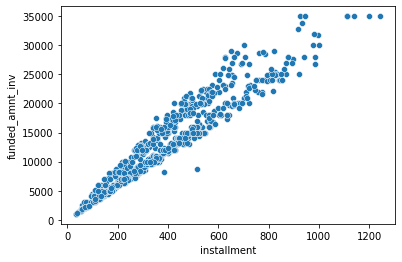

In [22]:

sns.scatterplot(data = p1_df, x="installment", y="funded_amnt_inv")


In the above plot, the pattern shows a direct relationship between these two continuous variables which means as the installments increases the funded amount invested also increases showing that these variables are related to each other, which we will later show it using correlation plot.

Discrete vs Continuous

purpose(discrete) and installment(continuous): A visualization using bar chart to show the relationship between a discrete and continuous variable. Moreover, to see if loan reputation affects the installment values or not.

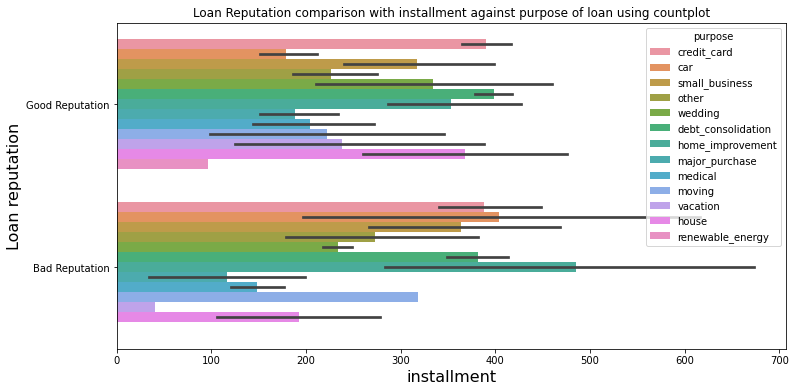

In [23]:

plt.figure(figsize = (12,6))
sns.barplot(x = p1_df['installment'], y = 'loan_status', hue = p1_df['purpose'], data = p1_df)
plt.title("Loan Reputation comparison with installment against purpose of loan using countplot")
plt.xlabel('installment', fontsize=16)
plt.ylabel("Loan reputation", fontsize=16)
plt.show()

##Reference: https://seaborn.pydata.org/generated/seaborn.catplot.html


The plot above shows that the bad reputation in loan leads to greater number of installment values than the people having good reputation for loan.
Here good repuation means that the loan is either paid off or current while bad reputation means that the loan is Charged Off, Default or Late(31-120 days)

Correlation Plot

<AxesSubplot:>

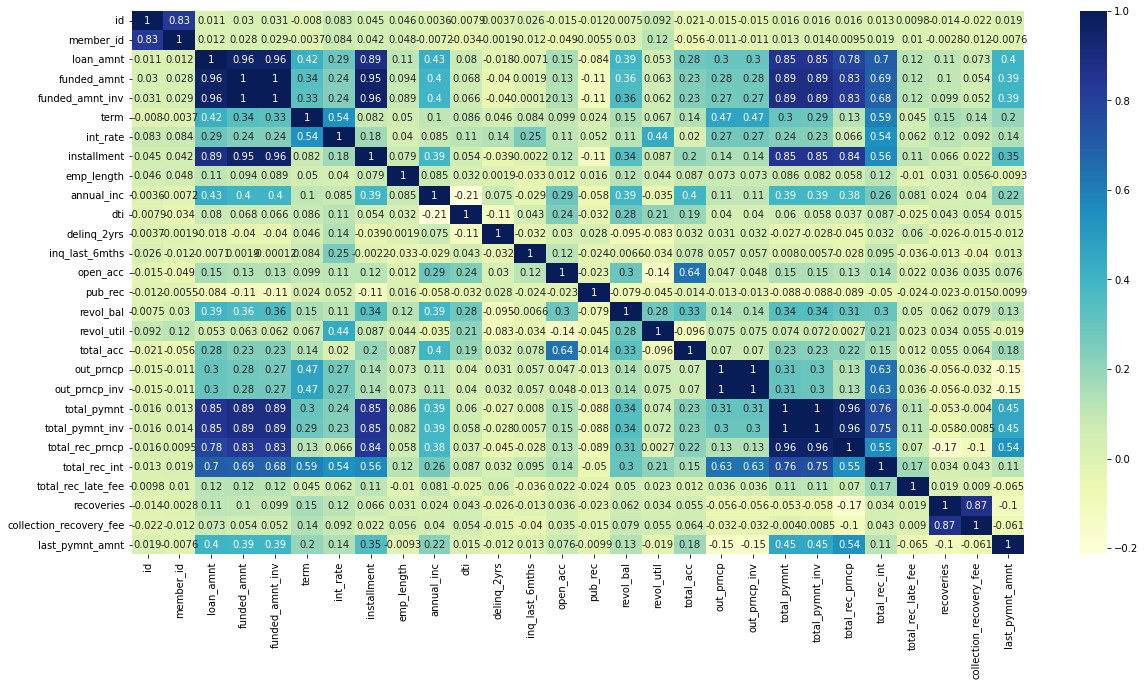

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(p1_df.corr(), cmap='YlGnBu', annot=True)

The correlation values above 0.5 show a high correlation between two variables which means that two variables are highly related with each other while the correlation values with less than 0.5 show that two variables are less related with each other. The 1s in the diagonal are supposed to be ignored because of course a variable would be the nost related with its same variable, for example the term with term has correlation sscore of 1.

At first, I drew a scatterplot and stated my hypothesis in bivariate analysis that installment and funded_amnt_inv were highly related as they showed direct relationship with each other so my correlation plot proves my hypothesis as correct because of high correlation value of 0.96.

In addition to this, there are very few columns which have the highest correlation value (1) which include:

funded and funded_amnt_inv,
out_prncp and out_prncp_inv, and
total_pymnt and total_pymnt_inv

It is because the sole purpose of the amount provided is to be invested.